In [1]:
# from six.moves import urllib
# from sklearn.datasets import fetch_mldata
# try:
#     mnist = fetch_mldata('MNIST original')
# except urllib.error.HTTPError as ex:
#     print("Could not download MNIST data from mldata.org, trying alternative...")

#     # Alternative method to load MNIST, if mldata.org is down
#     from scipy.io import loadmat
#     mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
#     mnist_path = "./mnist-original.mat"
#     response = urllib.request.urlopen(mnist_alternative_url)
#     with open(mnist_path, "wb") as f:
#         content = response.read()
#         f.write(content)
#     mnist_raw = loadmat(mnist_path)
#     mnist = {
#         "data": mnist_raw["data"].T,
#         "target": mnist_raw["label"][0],
#         "COL_NAMES": ["label", "data"],
#         "DESCR": "mldata.org dataset: mnist-original",
#     }
#     print("Success!")

In [2]:

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [3]:
from scipy.io import loadmat
mnist_path = './mnist-original.mat'
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [4]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

In [9]:
def plot_digit(digit_image):
    plt.imshow(digit_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
    plt.axis("off")
    plt.show()

In [10]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [11]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

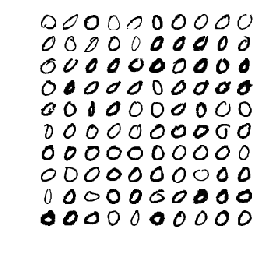

In [12]:
plot_digits(X[100:200])


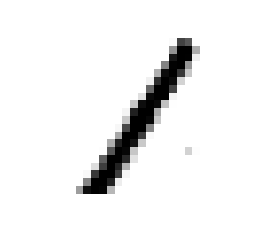

In [13]:
digit_1 = X[10000]
digit_1_image = digit_1.reshape(28, 28)
plot_digit(digit_1_image)

In [14]:
y[10000]

1.0

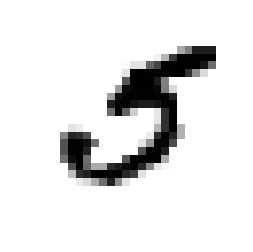

In [15]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [16]:
y[36000]

5.0

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:
import numpy as np

In [19]:
shuffle_index = np.random.permutation(60000)

In [20]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

*We train a binary classifier for the digit 5*

In [21]:
y_train_5 = (y_train == 5) # Only true for 5s and False for all other digits

In [22]:
y_test_5 = (y_test == 5)

*Now we train a Stochastic Gradient Classifier*

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
sgd_clf = SGDClassifier(random_state=42)

In [25]:
sgd_clf.fit(X_train, y_train_5)

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
for index in range(1000, 70000, 1000):
    digit = X[index]
    predicted = sgd_clf.predict([digit])
    if predicted:
        print("{} == {}".format(predicted, y[index]))


[ True] == 0.0
[ True] == 4.0
[ True] == 5.0
[ True] == 5.0
[ True] == 5.0
[ True] == 5.0
[ True] == 5.0
[ True] == 5.0


In [27]:
sgd_clf.predict([some_digit])

array([ True])

In [28]:
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  86, 131, 225, 225, 225,   0,   0,
          0,   0],
       [  

*Implementing cross-validation*

In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
from sklearn.base import clone

In [31]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [32]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9502


/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.96565


/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.96495


*Evaluate our model using cross_val_score()*

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

array([0.9502 , 0.96565, 0.96495])

*Dumb classifier for not-5 class*

In [35]:
from sklearn.base import BaseEstimator

In [36]:
class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
# let's try out the accuracy of our dumb classifier
never_5_clf = Never5Classifier()


In [38]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

*Confusion Matrix*

In [39]:
from sklearn.model_selection import cross_val_predict

In [40]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [43]:
# ideal confusion matrix has non-zero elements only in the diagnol like this...
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

*Let's find out the precision and recall*

In [44]:
from sklearn.metrics import precision_score, recall_score

In [45]:
precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [46]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

In [47]:
from sklearn.metrics import f1_score

In [48]:
print("Veer the F1 score is = ", f1_score(y_train_5, y_train_pred))

Veer the F1 score is =  0.7846820809248555


In [49]:
y_scores = sgd_clf.decision_function([some_digit])

In [50]:
y_scores

array([161855.74572176])

In [51]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

In [52]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [70]:


y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

In [71]:
y_scores

array([ -434076.49813641, -1825667.15281624,  -767086.76186905, ...,
        -867191.25267994,  -565357.11420164,  -366599.16018198])

In [72]:
from sklearn.metrics import precision_recall_curve

In [73]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [74]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    

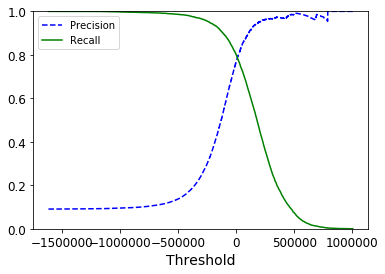

In [75]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

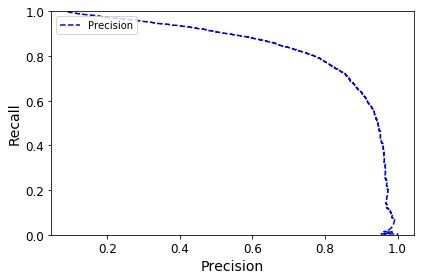

In [76]:
plt.plot(precisions, recalls, "b--", label="Precision")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.tight_layout()
plt.show()


In [77]:
y_train_pred_90 = (y_scores > 70000)

In [78]:
precision_score(y_train_5, y_train_pred_90)

0.8659205116491548

In [80]:
recall_score(y_train_5, y_train_pred_90)

0.6993174691016417

If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

In [81]:
from sklearn.metrics import roc_curve

In [82]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
# fpr = false positive rate = (1 - true negative rate)
# tpr = true positive rate

In [83]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    

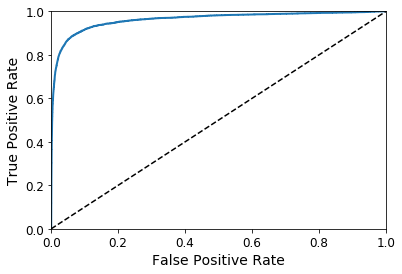

In [85]:
plot_roc_curve(fpr, tpr, "Roc Curve")
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
roc_auc_score(y_train_5, y_scores)

0.9624496555967156

*Random Forest Classifier*

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest_clf = RandomForestClassifier(random_state=42)

In [92]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [97]:
y_probas_forest

array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [98]:
y_scores_forest = y_probas_forest[:, 1] # select 1'st column as scores as it is the probability 
# of the positive class

In [99]:
y_scores_forest

array([0. , 0.1, 0. , ..., 0. , 0. , 0. ])

In [100]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

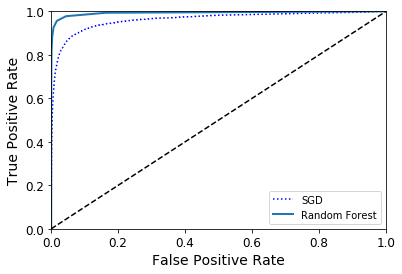

In [101]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [102]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

MultiClass Classification

In [103]:
sgd_clf.fit(X_train, y_train)

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [104]:
sgd_clf.predict([some_digit])

array([5.])

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [ ]:
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
sgd_clf.classes_

In [ ]:
sgd_clf.classes_[5]

*Forcefully making One Vs One classifiers*

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [ ]:
ovo_clf.fit(X_train, y_train)

In [ ]:
ovo_clf.predict([some_digit])

In [ ]:
len(ovo_clf.estimators_)

In [ ]:
forest_clf.fit(X_train, y_train)


In [ ]:
forest_clf.predict([some_digit])

In [ ]:
forest_clf.predict_proba([some_digit])

We evaluate SGDClassifier's accuracy using cross_val_score()

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

We scale the inputs to improve the accuracy of our SGD classifier

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

*Error Analysis*
To find the kinds of errors our model makes we analyze the confusion matrix

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [ ]:
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# the more gray the higher the error

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [ ]:
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=200, facecolor='w', edgecolor='k')

In [ ]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5

In [ ]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

The two 5X5 blocks on the left show digits classified as 3s and the two 5X5 blocks on the right show images classified as 5s.

### Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train_large = (y_train >= 7)

In [ ]:
y_train_odd = (y_train % 2 == 1)

In [ ]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
# we have mixed two categories in one
y_multilabel

In [ ]:
knn_clf = KNeighborsClassifier()

In [ ]:
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
f1_score(y_train, y_train_knn_pred, average="macro")

It takes long time to do this KNN training on my old computer

Multioutput Classification

In [ ]:
# creates an array of 60000 X 784 with random numbers between 0,100
noise = np.random.randint(0, 100, (len(X_train), 784))

# we add this noise to our training dataset
X_train_mod = X_train + noise

# we repeat for our test dataset
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# our labels will be our original training and test dataset
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"


In [ ]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)

In [ ]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])

In [ ]:
plot_digit(clean_digitn_digit)